In [12]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv("/home/apoirotb/dev/Inria/survivalGPU/simulations/Simulation_results/17-01-2024-n_patient_exponential_weight/analyzed_17-01-2024-n_patient_exponential_weight.csv")
df.head()

,path,n_patients,weight_function,n_bootstraps,nknots,cutoff,constraint,weight_diff_mean,weight_diff_95p,weight_diff_5p,air_diff_mean,air_diff_95p,air_diff_5p
0,../Simulation_results/17-01-2024-n_patient_exp...,50,exponential_weight,1000,1,180,Right,0.005762,0.010602,0.002095,0.546241,1.446740,0.040653
1,../Simulation_results/17-01-2024-n_patient_exp...,50,exponential_weight,1000,2,180,Right,0.008128,0.014093,0.003543,0.644034,1.605049,0.044044
2,../Simulation_results/17-01-2024-n_patient_exp...,50,exponential_weight,1000,3,180,Right,0.012459,0.019951,0.006206,0.753203,1.790205,0.069428
3,../Simulation_results/17-01-2024-n_patient_exp...,100,exponential_weight,1000,1,180,Right,0.003728,0.006384,0.001460,0.318666,0.780759,0.024342
4,../Simulation_results/17-01-2024-n_patient_exp...,100,exponential_weight,1000,2,180,Right,0.004800,0.008394,0.001890,0.340768,0.838429,0.029338


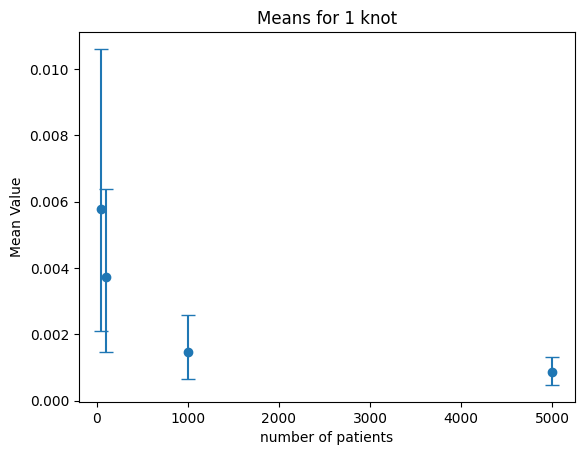

In [36]:
analyzed_df = df[df["nknots"] == 1]

means = analyzed_df["weight_diff_mean"]
n_patients = analyzed_df["n_patients"]
percentile_95 = analyzed_df["weight_diff_95p"]
percentile_5 = analyzed_df["weight_diff_5p"]
error_lower = [mean - p5 for mean, p5 in zip(means, percentile_5)]
error_upper = [p95 - mean for mean, p95 in zip(means, percentile_95)]
error = [error_lower, error_upper]  # Matplotlib needs error in this format



plt.errorbar(n_patients, means, yerr=error, fmt='o', capsize=5)
plt.xlabel('number of patients')
plt.ylabel('Mean Value')
plt.title('Means for 1 knot')
plt.show()

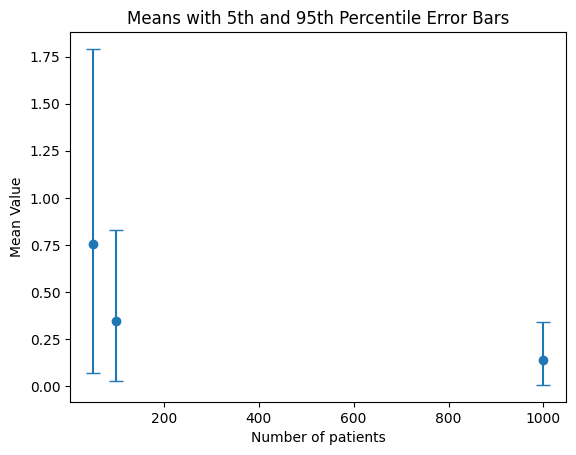

In [39]:
analyzed_df = df[df["nknots"] == 3]

means = analyzed_df["air_diff_mean"]
n_patients = analyzed_df["n_patients"]
percentile_95 = analyzed_df["air_diff_95p"]
percentile_5 = analyzed_df["air_diff_5p"]
error_lower = [mean - p5 for mean, p5 in zip(means, percentile_5)]
error_upper = [p95 - mean for mean, p95 in zip(means, percentile_95)]
error = [error_lower, error_upper]  # Matplotlib needs error in this format



plt.errorbar(n_patients, means, yerr=error, fmt='o', capsize=5)
plt.xlabel('Number of patients')
plt.ylabel('Mean Value')
plt.title('Means with 5th and 95th Percentile Error Bars')
plt.show()